In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv('/content/fake_jobs (1).csv')

In [4]:
print(df.head())
print(df.info())

   title_length  description_length  has_company_profile is_fake
0            72                 740                    1     yes
1            95                 476                    0      no
2            60                 662                    1     yes
3            34                 317                    0      no
4            67                 884                    0     yes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title_length         100 non-null    int64 
 1   description_length   100 non-null    int64 
 2   has_company_profile  100 non-null    int64 
 3   is_fake              100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [5]:
print(df.shape)

(100, 4)


In [13]:
print(df.head())
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


   title_length  description_length  has_company_profile is_fake
0            72                 740                    1     yes
1            95                 476                    0      no
2            60                 662                    1     yes
3            34                 317                    0      no
4            67                 884                    0     yes


In [14]:
label_encoder = LabelEncoder()
df['is_fake'] = label_encoder.fit_transform(df['is_fake'])  # yes -> 1, no -> 0


In [15]:
X = df[['title_length', 'description_length', 'has_company_profile']]
y = df['is_fake']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier


In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, accuracy_score


In [18]:
y_pred = model.predict(X_test)


In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.62      0.42      0.50        12

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.50        20
weighted avg       0.54      0.50      0.50        20



In [23]:
sample = [[50, 500, 1]]  # [title_length, description_length, has_company_profile]
prediction = model.predict(sample)

print("Fake" if prediction[0] == 1 else "Real")


Fake


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


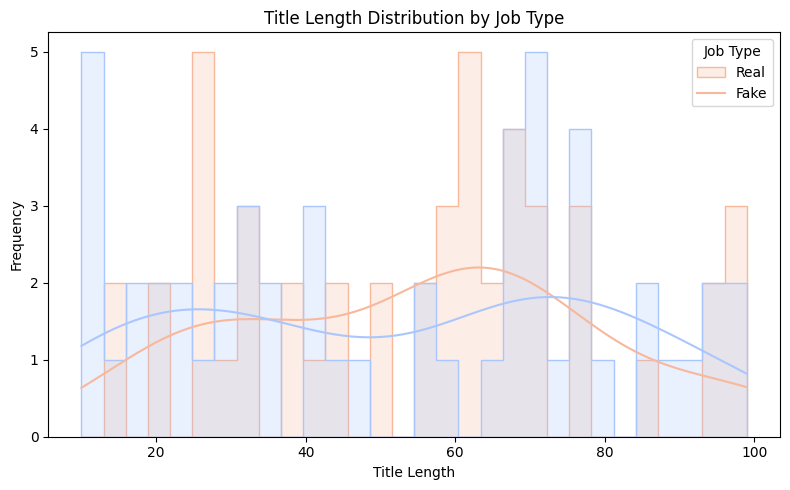

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='title_length', hue='is_fake', bins=30, kde=True, palette='coolwarm', element='step')
plt.title("Title Length Distribution by Job Type")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.legend(title='Job Type', labels=['Real', 'Fake'])
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [26]:
# Sample model setup (skip this if your model is already trained)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)


In [27]:
sample_df = pd.DataFrame([[50, 500, 1]], columns=['title_length', 'description_length', 'has_company_profile'])


In [28]:
prediction = model.predict(sample_df)


In [29]:
color = 'red' if prediction[0] == 1 else 'green'
label = 'Fake' if prediction[0] == 1 else 'Real'


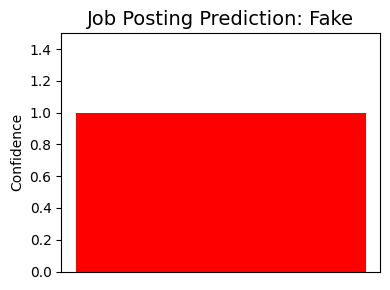

In [30]:
plt.figure(figsize=(4, 3))
plt.bar(['Prediction'], [1], color=color)
plt.ylim(0, 1.5)
plt.title(f"Job Posting Prediction: {label}", fontsize=14)
plt.ylabel("Confidence")
plt.xticks([])
plt.tight_layout()



In [31]:
plt.savefig("prediction_output.png")


<Figure size 640x480 with 0 Axes>

In [32]:
plt.show()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [33]:
y_pred = model.predict(X_test)


In [34]:
cm = confusion_matrix(y_test, y_pred)


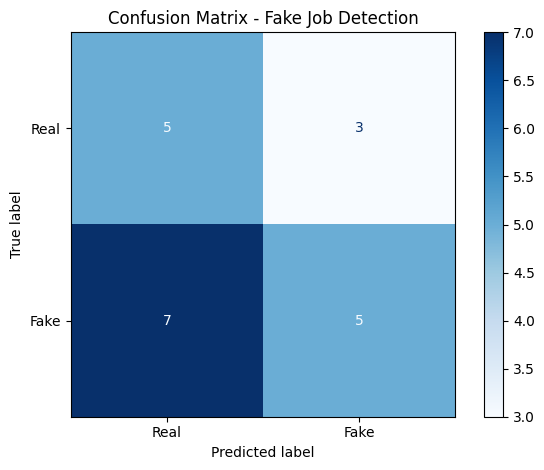

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Fake Job Detection")
plt.tight_layout()
plt.show()